In [2]:
import numpy as np
import os
import pandas as pd
import plotnine as pn

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
main_path = '/Users/kurtsmith/research/multiagent-rl/data/testing/constantbot/'
ddpg_path = main_path + 'ddpg/'
rdpg_path = main_path + 'rdpg/'
ddpg_runs = os.listdir(ddpg_path)
rdpg_runs = os.listdir(rdpg_path)
ddpg_runs = [f'{ddpg_path}{run}/' for run in ddpg_runs]
rdpg_runs = [f'{rdpg_path}{run}/' for run in rdpg_runs]

In [5]:
def get_runs(subdir, main_path=main_path, exp_name=None):
    path = main_path + subdir + '/'
    runs = os.listdir(path)
    runs = [f'{path}{run}/' for run in runs]
    if exp_name:
        exp_runs = []
        for r in runs:
            in_exp = False
            c = open(f'{r}config.json', "r")
            for line in c:
                if re.search(f'"{exp_name}",', line):
                    in_exp = True
            if in_exp: 
                exp_runs.append(r)
            runs = exp_runs
    prog = {x: pd.read_table(f'{x}progress.txt') for x in runs}
    for i, r in enumerate(prog):
        prog[r]['run'] = f'run_{i}'
    prog = pd.concat(prog.values())
    return prog, runs

In [6]:
import re

exp_name = "polya_0_900"
conf = "/Users/kurtsmith/research/multiagent-rl/data/testing/constantbot/ddpg_orig/1610835051/config.json"
conf = open(conf, "r")
for line in conf:
    if re.search(f'"{exp_name}",', line):
        print(line)

    "exp_name":	"polya_0_900",

            "exp_name":	"polya_0_900",

        "exp_name":	"polya_0_900",



In [7]:
ddpg, ddpg_runs = get_runs('ddpg', exp_name = 'q_32x4')
ddpg_noise_5, _ = get_runs('ddpg', exp_name = 'q_32x4_noise_0_5')
ddpg_noise_02, _ = get_runs('ddpg', exp_name = 'q_32x4_noise_0_02')

In [8]:
ddpg_orig, ddpg_orig_runs = get_runs('ddpg_orig', exp_name = 'q_32x4')
rdpg, rdpg_runs = get_runs('rdpg')
ddpg_polya, _ = get_runs('ddpg_orig', exp_name = 'polya_0_900')
ddpg_gamma, _ = get_runs('ddpg_orig', exp_name = 'gamma_0_00')
td3_orig, _ = get_runs('td3_orig', exp_name = 'q_32x4')
td3_gamma, _ = get_runs('td3_orig', exp_name = 'gamma_0_00')

In [9]:
td3_nonflat, _ = get_runs('td3', exp_name = 'nonflat_reward')

EmptyDataError: No columns to parse from file

In [217]:
sac, _ = get_runs('sac_orig', exp_name = 'q_32x2')

In [318]:
sac_decr_98, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_98')
sac_decr_94, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_94')
sac_decr_90, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_90')
sac_decr_50, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_50')
sac_auto, _ = get_runs('sac_orig', exp_name = 'auto_alpha')
sac_orig_auto_t4, _ = get_runs('sac_orig', exp_name = 'new_auto_alpha_targ_4')
sac_done_auto_t4, _ = get_runs('sac_orig', exp_name = 'done_auto_alpha_targ_4')
sac_orig_auto_t8, _ = get_runs('sac_orig', exp_name = 'auto_alpha_targ_8')



In [463]:
sac, _ = get_runs('sac', exp_name = 'first_sac_test')
sac_auto_t4, _ = get_runs('sac', exp_name = 'auto_alpha_targ_4')
sac_done_t4, _ = get_runs('sac', exp_name = 'done_alpha_targ_4')
sac_auto_t8, _ = get_runs('sac', exp_name = 'auto_alpha_targ_8')

# Try tuning alpha/entr targ/LR with gamma=0.
# Should be solvable!
sac_gamma_0, _ = get_runs('sac', exp_name = 'gamma_0_alpha_05_targ_4')
sac_gamma_50, _ = get_runs('sac', exp_name = 'gamma_50_alpha_05_targ_4')
sac_gamma_90, _ = get_runs('sac', exp_name = 'gamma_90_alpha_05_targ_4')
sac_gamma_99, _ = get_runs('sac', exp_name = 'gamma_99_alpha_05_targ_4')
sac_gamma_99_a_20, _ = get_runs('sac', exp_name = 'gamma_99_alpha_20_targ_4')
sac_gamma_99_a_20_t1, _ = get_runs('sac', exp_name = 'gamma_99_alpha_20_targ_1')
sac_gamma_99_done, _ = get_runs('sac', exp_name = 'gamma_99_done')
sac_gamma_99_done2, _ = get_runs('sac', exp_name = 'gamma_99_done_loss')
sac_random_10, _ = get_runs('sac', exp_name = 'random_d')
sac_random_01, _ = get_runs('sac', exp_name = 'random_01')
sac_random_001, _ = get_runs('sac', exp_name = 'random_001')
sac_permute, _ = get_runs('sac', exp_name = 'permute_d')
sac_zeros, _ = get_runs('sac', exp_name = 'zeros_like')
sac_random_01_lr_01, _ = get_runs('sac', exp_name = 'random_01_lr_01')
sac_random_01_lr2_01, _ = get_runs('sac', exp_name = 'random_01_lr2_01')
sac_nonflat, nfr = get_runs('sac', exp_name = 'standard_nonflat')

In [464]:
sac_100, _ = get_runs('sac', exp_name = 'ep_len_100')

In [465]:
# var = 'AverageTestActOffer'
# var = 'AverageTestActDemand'
# var = 'LossPi'
var = 'AverageTestEpRet'
# var = 'AverageEpRet'

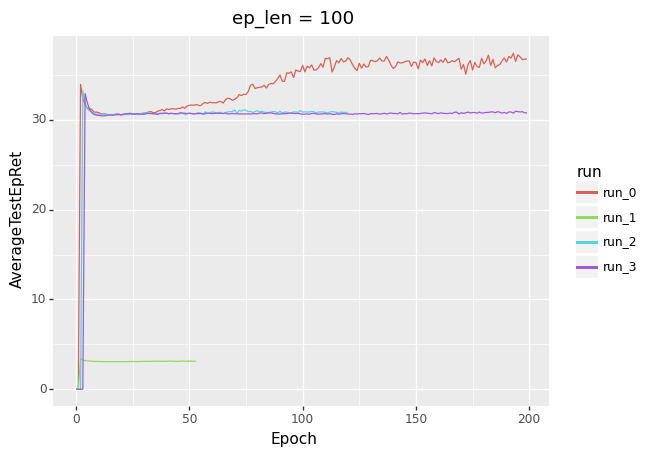

<ggplot: (8790607287535)>

In [466]:
display(pn.ggplot(sac_100, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='ep_len = 100'))

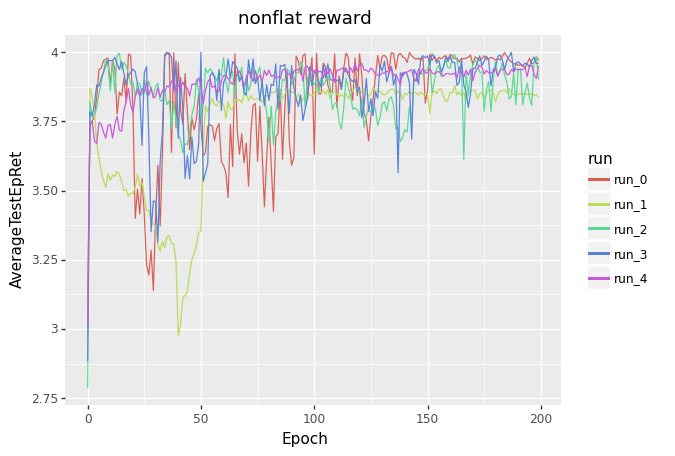

<ggplot: (-9223363246214104460)>

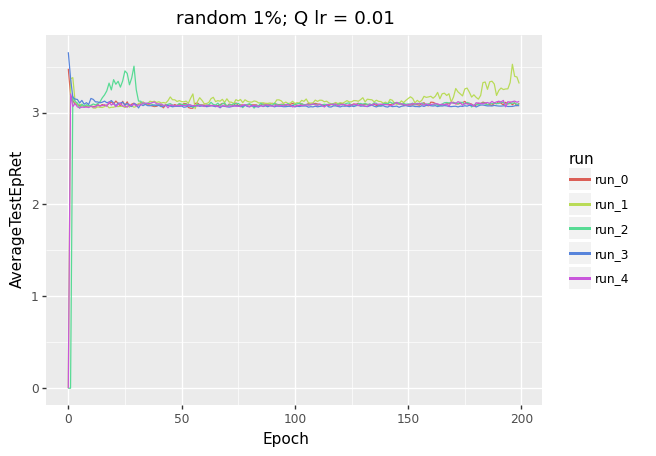

<ggplot: (8790691146458)>

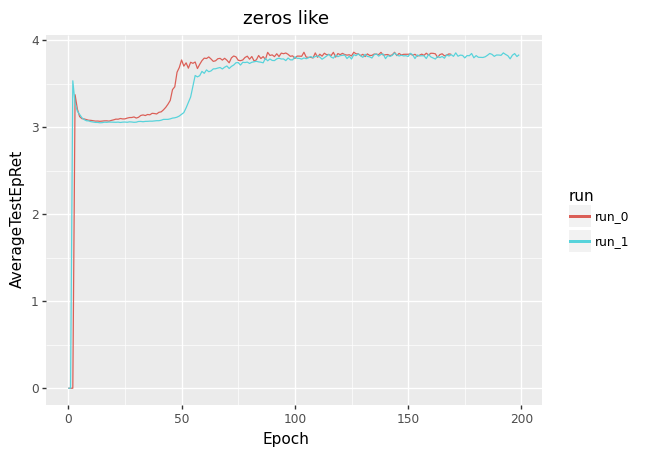

<ggplot: (8790708419311)>

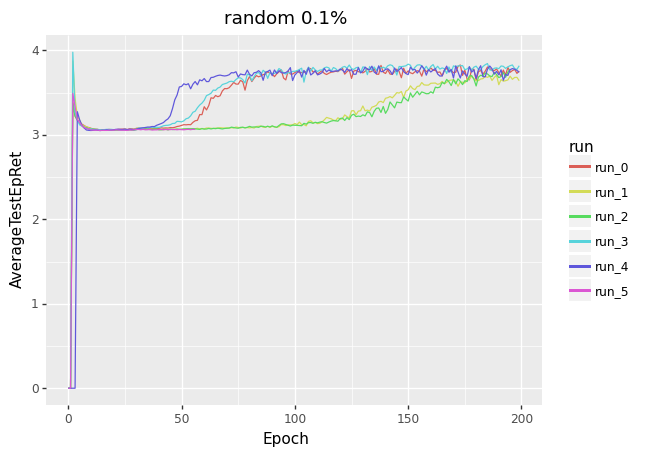

<ggplot: (8790708419311)>

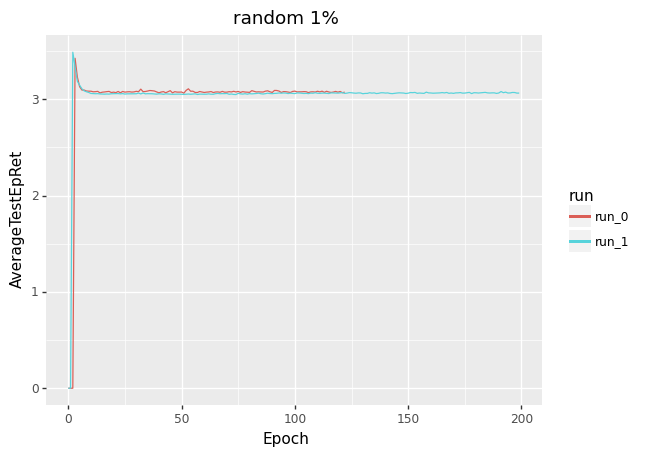

<ggplot: (8790489757062)>

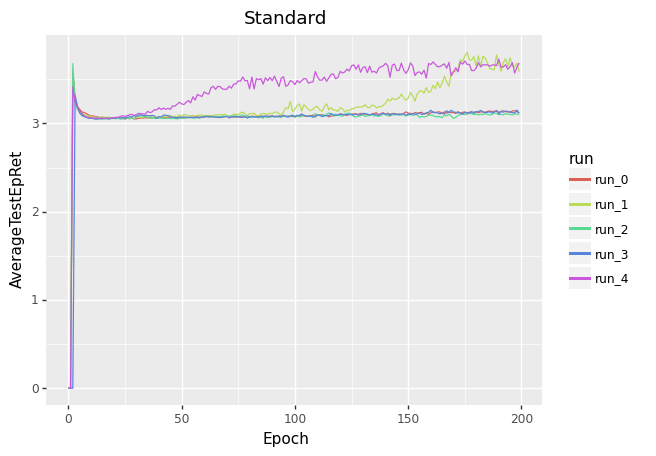

<ggplot: (8790573611570)>

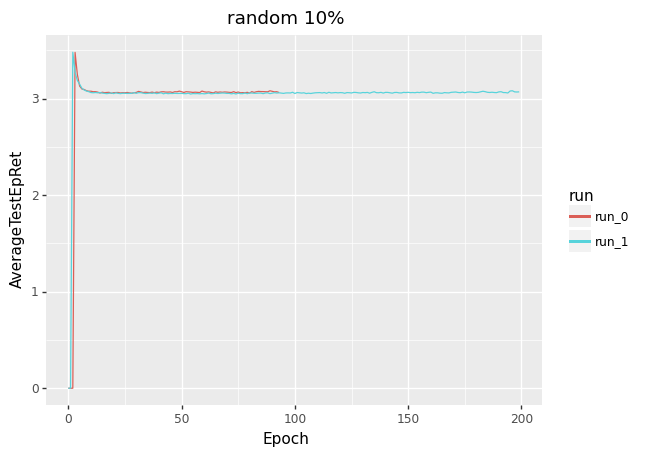

<ggplot: (-9223363246381879068)>

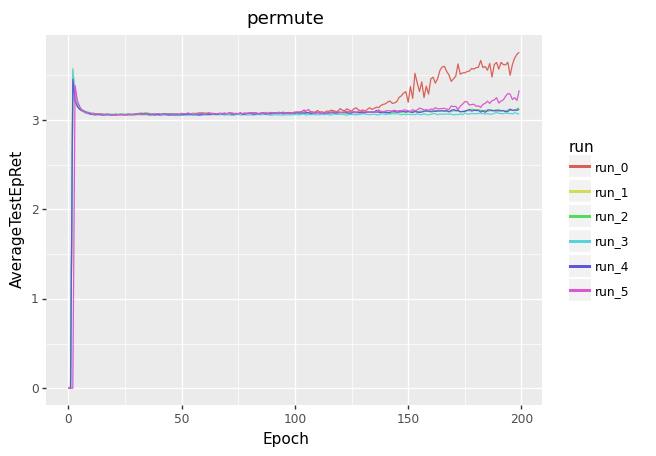

<ggplot: (8790708419311)>

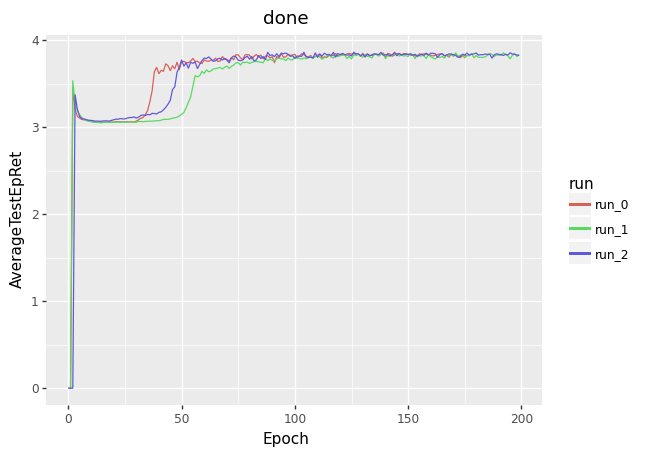

<ggplot: (8790691146416)>

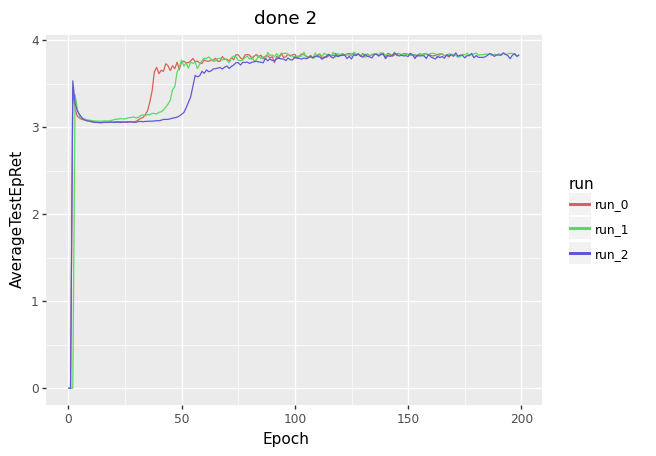

<ggplot: (8790489757062)>

In [467]:
display(pn.ggplot(sac_nonflat, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='nonflat reward'))
display(pn.ggplot(sac_random_01_lr2_01, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 1%; Q lr = 0.01'))
display(pn.ggplot(sac_zeros, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='zeros like'))
display(pn.ggplot(sac_random_001, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 0.1%'))
display(pn.ggplot(sac_random_01, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 1%'))
display(pn.ggplot(sac_gamma_99, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='Standard'))
display(pn.ggplot(sac_random_10, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 10%'))
display(pn.ggplot(sac_permute, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='permute'))
display(pn.ggplot(sac_gamma_99_done, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='done'))
display(pn.ggplot(sac_gamma_99_done2, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='done 2'))

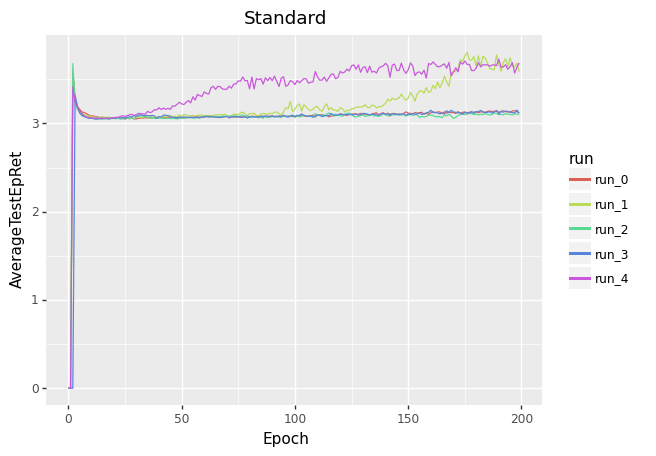

<ggplot: (-9223363246347903912)>

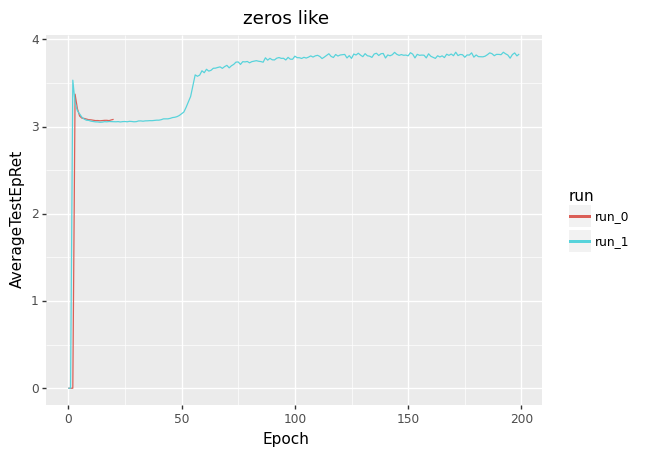

<ggplot: (8790506871991)>

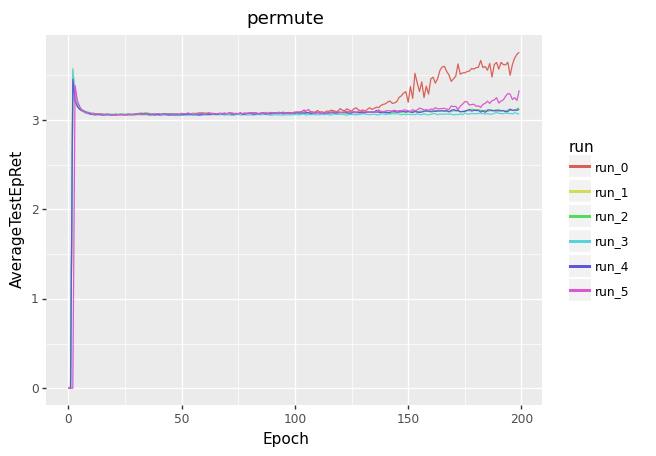

<ggplot: (8790506871893)>

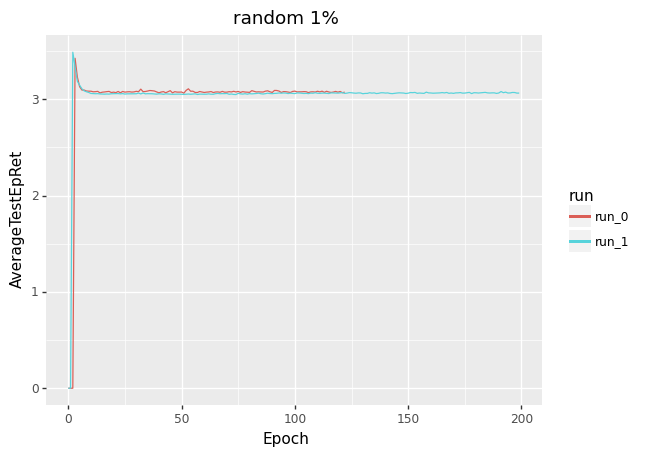

<ggplot: (-9223363246347903891)>

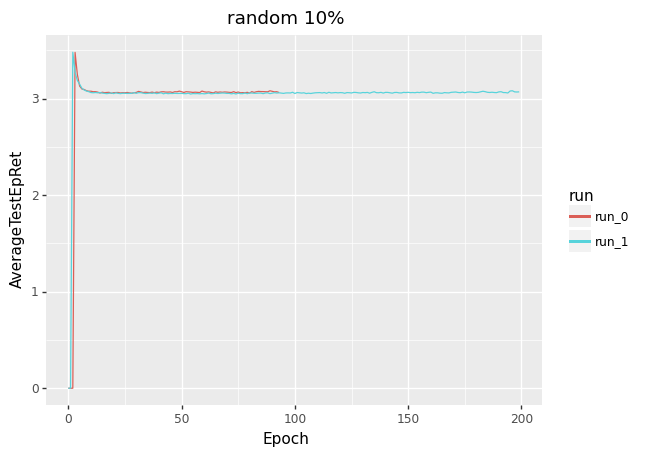

<ggplot: (-9223363246347903912)>

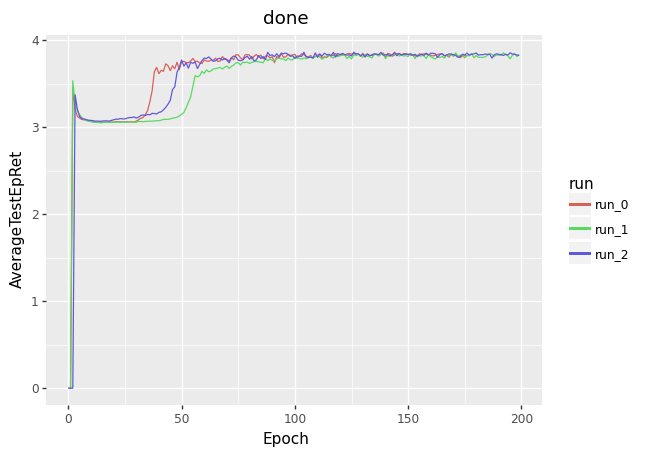

<ggplot: (-9223363246347903891)>

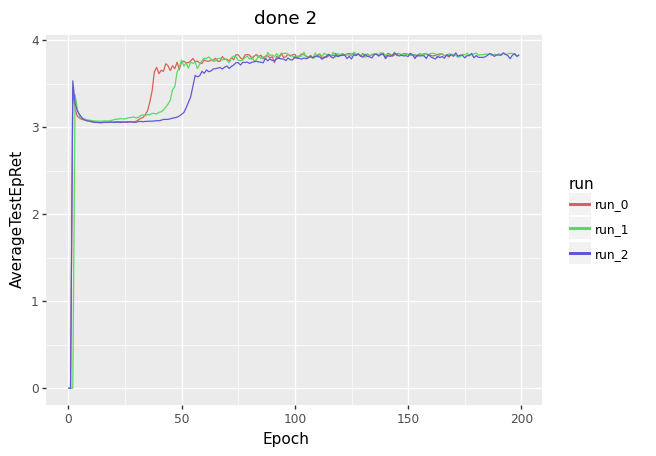

<ggplot: (-9223363246347903835)>

99 a 20


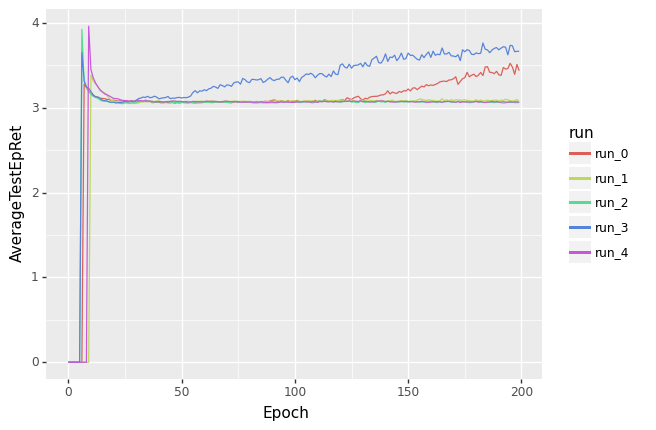

<ggplot: (-9223363246347903891)>

99 a 20 t1


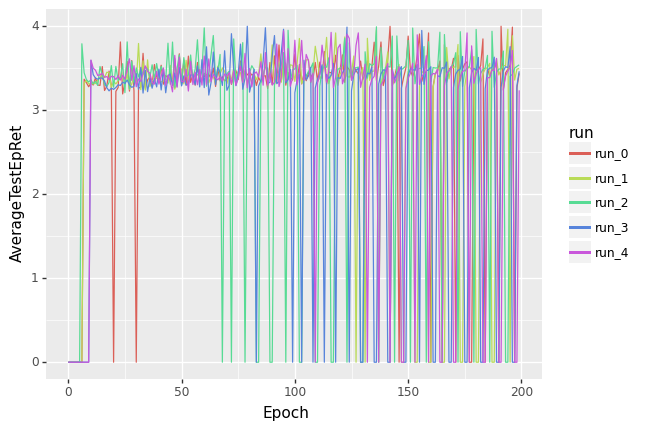

<ggplot: (-9223363246347903891)>

0


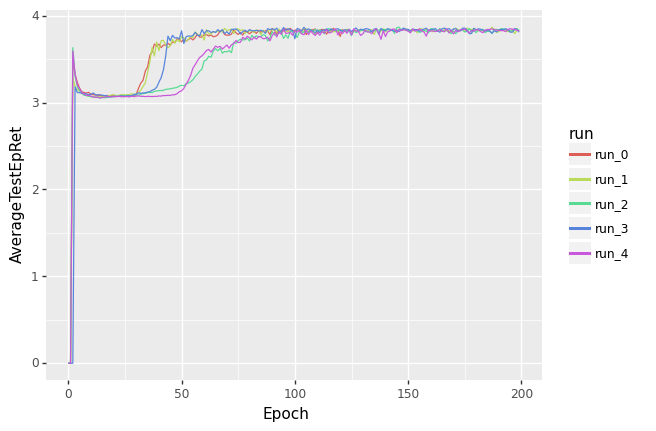

<ggplot: (-9223363246347903891)>

50


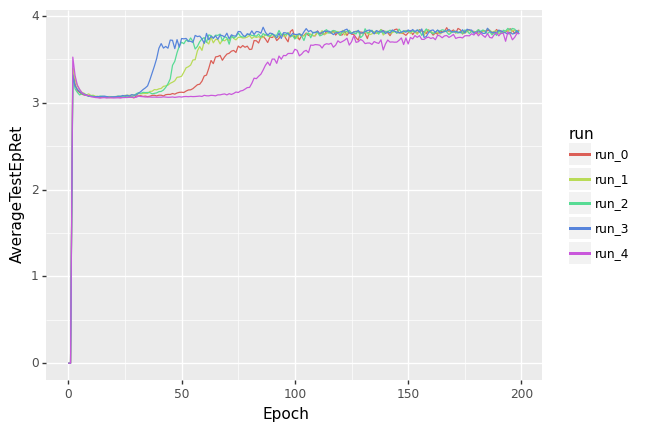

<ggplot: (-9223363246347903891)>

90


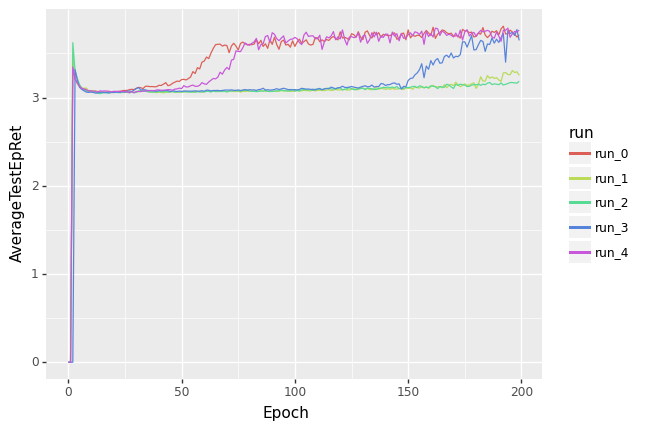

<ggplot: (8790557076670)>

In [365]:
print('99 a 20')
display(pn.ggplot(sac_gamma_99_a_20, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('99 a 20 t1')
display(pn.ggplot(sac_gamma_99_a_20_t1, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('0')
display(pn.ggplot(sac_gamma_0, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('50')
display(pn.ggplot(sac_gamma_50, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('90')
display(pn.ggplot(sac_gamma_90, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))

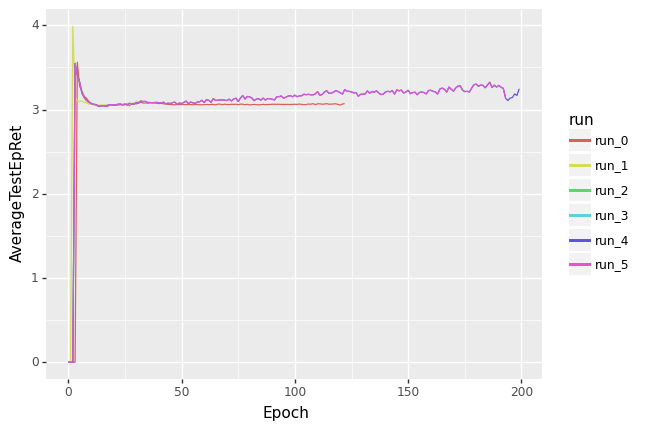

<ggplot: (-9223363246247649469)>

In [209]:
pn.ggplot(sac_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

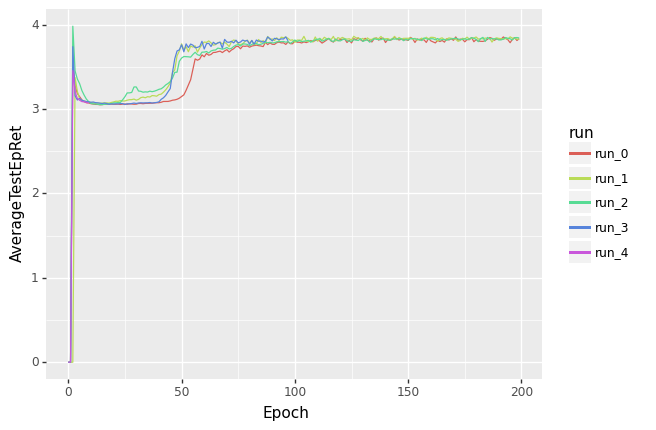

<ggplot: (-9223363246281150888)>

In [162]:
pn.ggplot(sac_done_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

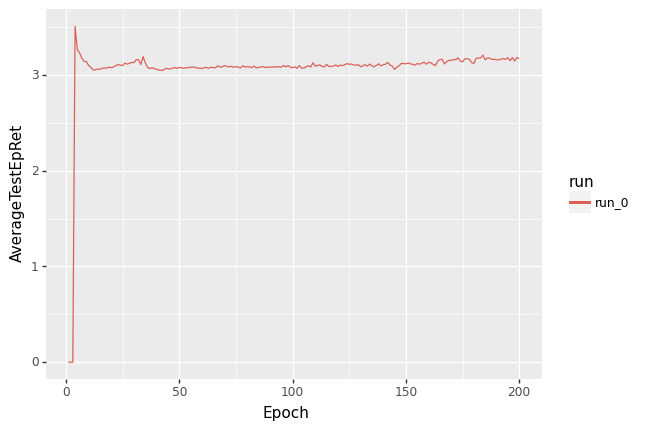

<ggplot: (8790607138361)>

In [119]:
pn.ggplot(sac_orig_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

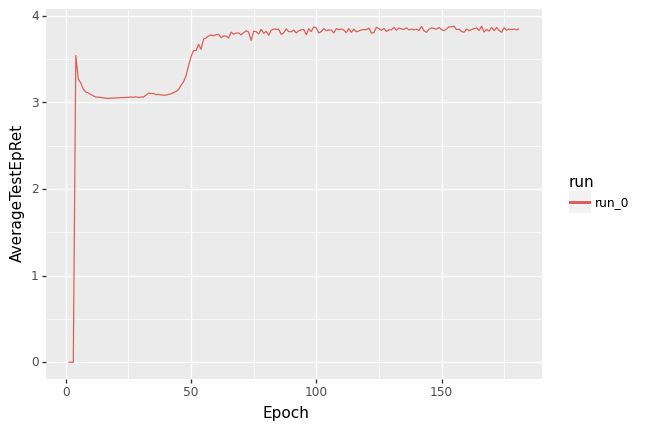

<ggplot: (-9223363246281183074)>

In [122]:
pn.ggplot(sac_done_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

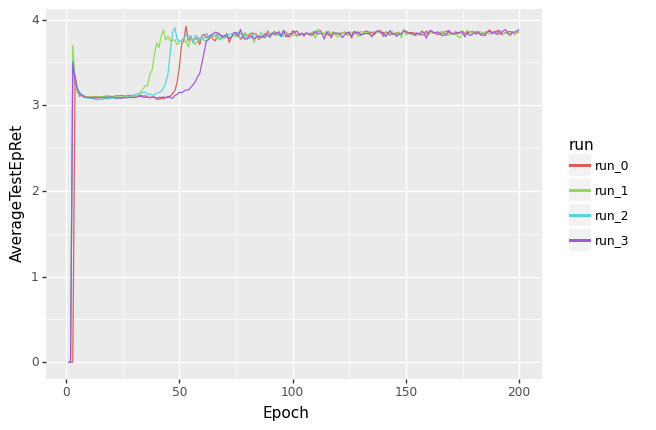

<ggplot: (-9223363246281177982)>

In [33]:
pn.ggplot(sac_orig_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

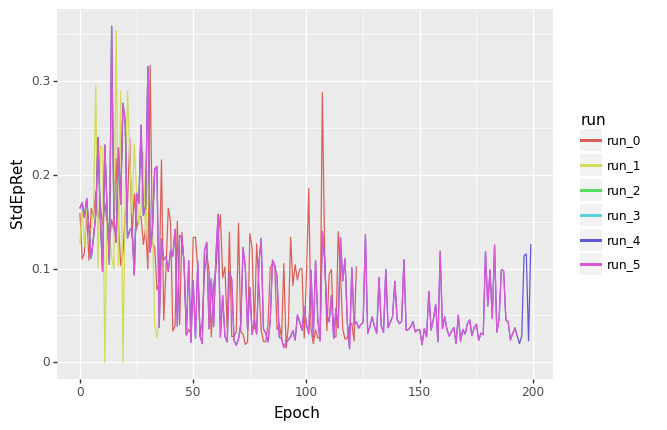

<ggplot: (8790640674957)>

In [96]:
pn.ggplot(sac_auto_t4, pn.aes(x='Epoch', y='StdEpRet', color='run')) + pn.geom_line()

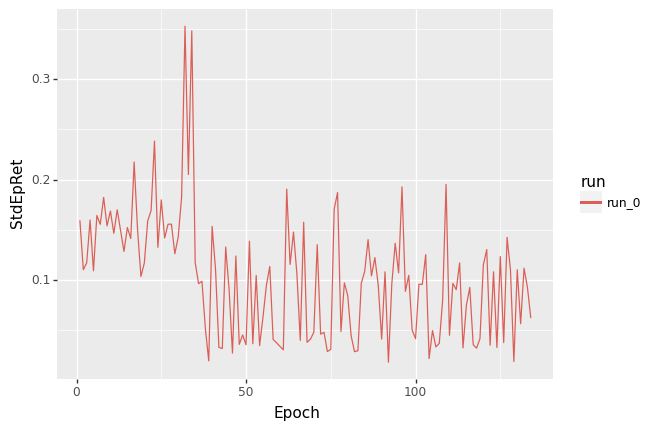

<ggplot: (-9223363246214100981)>

In [97]:
pn.ggplot(sac_orig_auto_t4, pn.aes(x='Epoch', y='StdEpRet', color='run')) + pn.geom_line()

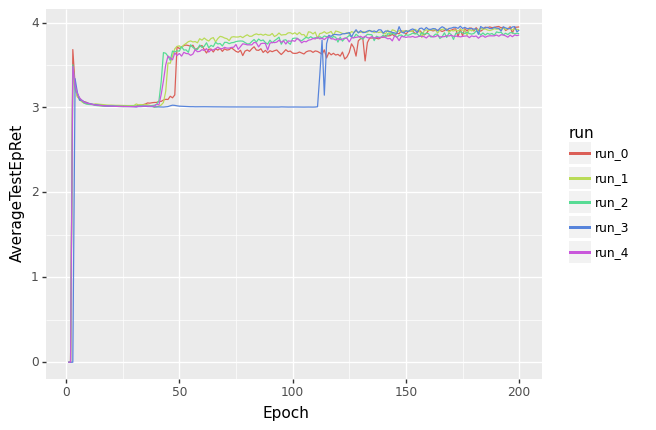

<ggplot: (-9223363246180283069)>

In [100]:
pn.ggplot(sac_orig_auto_t8, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(td3_nonflat, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_auto, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

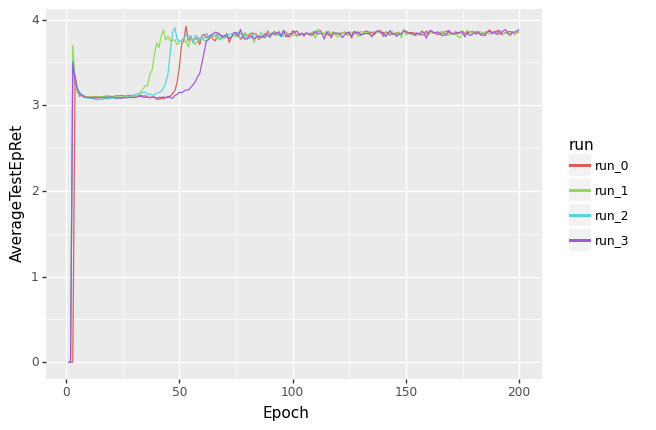

<ggplot: (8790657353655)>

In [14]:
pn.ggplot(sac_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_auto_t8, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_98, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_94, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_90, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_50, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
display(sac[sac["Epoch"]==200])
display(sac_auto_t4[sac_auto_t4["Epoch"]==200])
display(sac_auto_t8[sac_auto_t8["Epoch"]==200])

display(sac_decr_98[sac_decr_98["Epoch"]==200])
display(sac_decr_94[sac_decr_94["Epoch"]==200])
display(sac_decr_90[sac_decr_90["Epoch"]==200])
display(sac_decr_50[sac_decr_50["Epoch"]==200])

In [ ]:
pn.ggplot(td3_orig, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(td3_gamma, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_orig, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_polya, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='LossQ', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='LossPi', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='AverageQVals', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_noise_5, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_noise_02, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='LossQ', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='LossPi', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='AverageQVals', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='StdQVals', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(rdpg, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(rdpg, pn.aes(x='Epoch', y='AverageQVals', color='run')) + pn.geom_line()

In [1133]:
# q1_map = pd.read_csv("/Users/kurtsmith/research/multiagent-rl/data/q_1_map.csv")
# q2_map = pd.read_csv("/Users/kurtsmith/research/multiagent-rl/data/q_2_map.csv")

q1_map = pd.read_csv("/Users/kurtsmith/research/multiagent-rl/data/q_rsac_1_map.csv")
q2_map = pd.read_csv("/Users/kurtsmith/research/multiagent-rl/data/q_rsac_2_map.csv")

In [1134]:
q1_map.shape

(336633, 9)

In [1135]:
step_vals = q1_map['step'].unique()
print(step_vals)

[  999  1999  2999  3999  4999  5999  6999  7999  8999  9999 10999 11999
 12999 13999 14999 15999 16999 17999 18999 19999 20999 21999 22999 23999
 24999 25999 26999]


In [1151]:
sac, nfr = get_runs('sac', exp_name = 'alpha_8')
sac_new, nfr_new = get_runs('sac', exp_name = 'alpha_8_new_buf')
rsac, nfrsac = get_runs('rsac', exp_name = 'test')

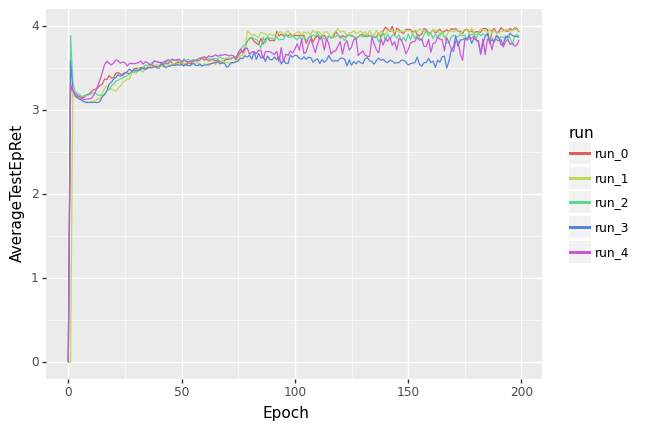

<ggplot: (8790507310614)>

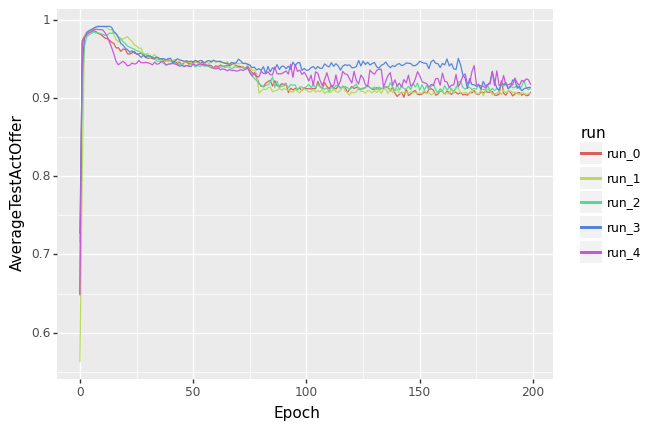

<ggplot: (8790491716272)>

In [1152]:
display(pn.ggplot(rsac, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line())
display(pn.ggplot(rsac, pn.aes(x='Epoch', y='AverageTestActOffer', color='run')) + pn.geom_line())

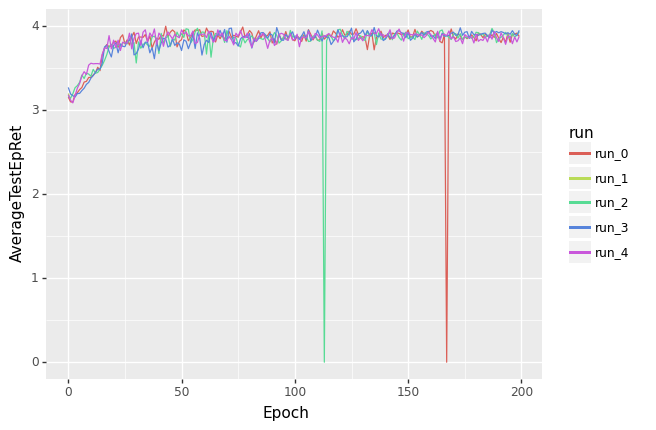

<ggplot: (-9223363246297695214)>

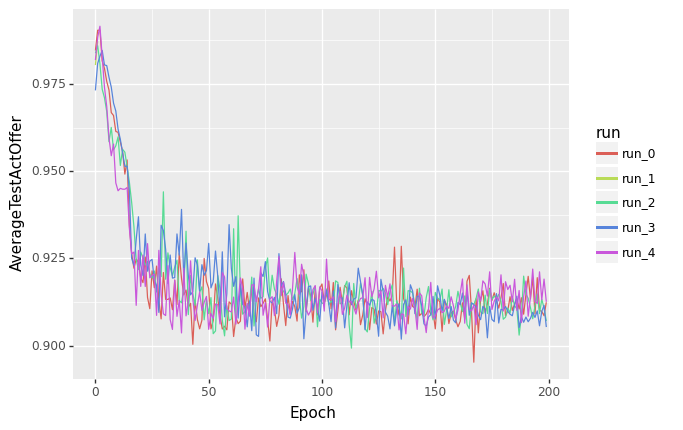

<ggplot: (8790557080794)>

In [1083]:
display(pn.ggplot(sac_new, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line())
display(pn.ggplot(sac_new, pn.aes(x='Epoch', y='AverageTestActOffer', color='run')) + pn.geom_line())
# display(pn.ggplot(sac[sac['run']=='run_4'], pn.aes(x='Epoch', y='AverageTestActOffer', color='run')) + pn.geom_line())

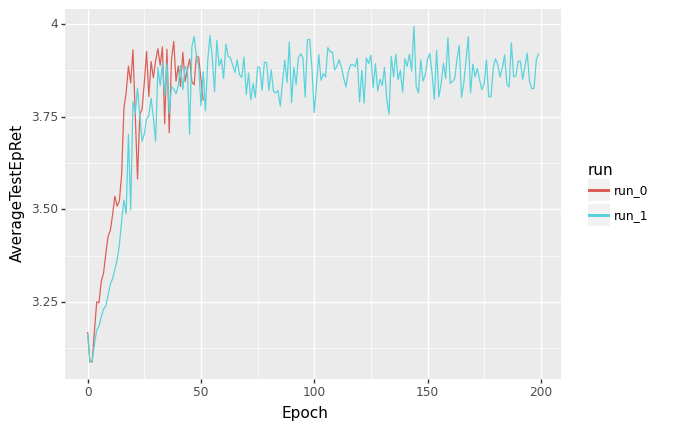

<ggplot: (-9223363246330825556)>

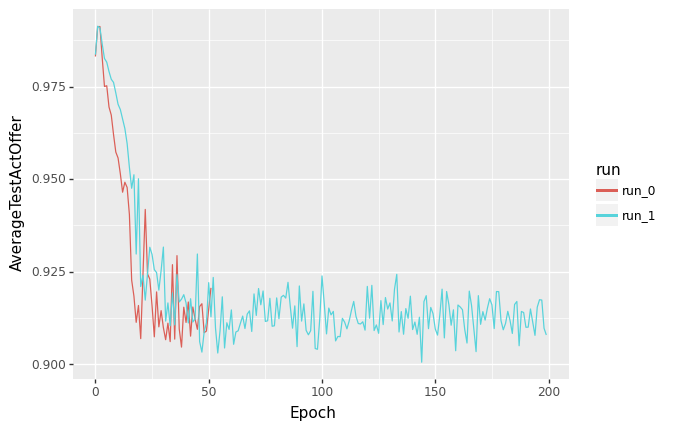

<ggplot: (-9223363246297085289)>

In [1077]:
display(pn.ggplot(sac, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line())
display(pn.ggplot(sac, pn.aes(x='Epoch', y='AverageTestActOffer', color='run')) + pn.geom_line())
# display(pn.ggplot(sac[sac['run']=='run_4'], pn.aes(x='Epoch', y='AverageTestActOffer', color='run')) + pn.geom_line())

In [1136]:
cols = ['a_0', 'a_1', 'q', 'step']
merge_cols = ['a_0', 'a_1', 'step']
q_comb = pd.merge(q1_map[cols], q2_map[cols], on =merge_cols)
q_comb['q'] = q_comb[['q_x', 'q_y']].min(axis=1)

In [1137]:
# q_map = q1_map
# q_map = q2_map
q_map = q_comb

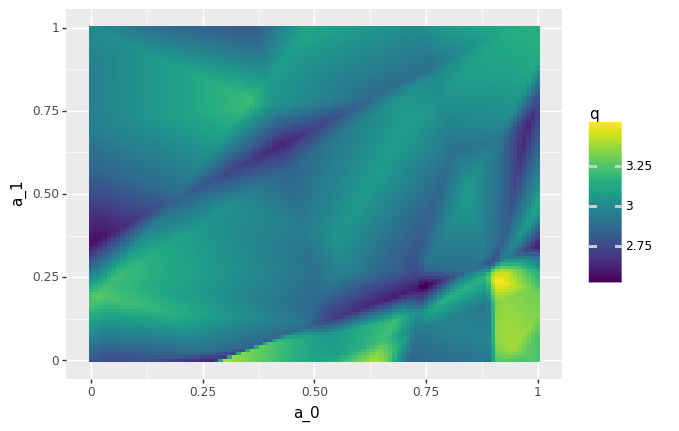

<ggplot: (-9223363246381789373)>

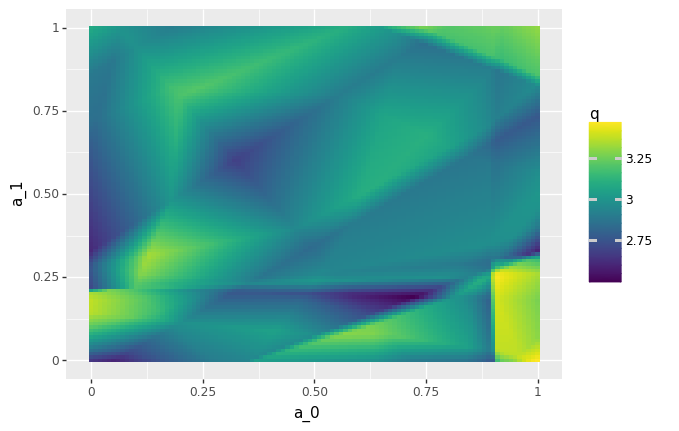

<ggplot: (-9223363246230039208)>

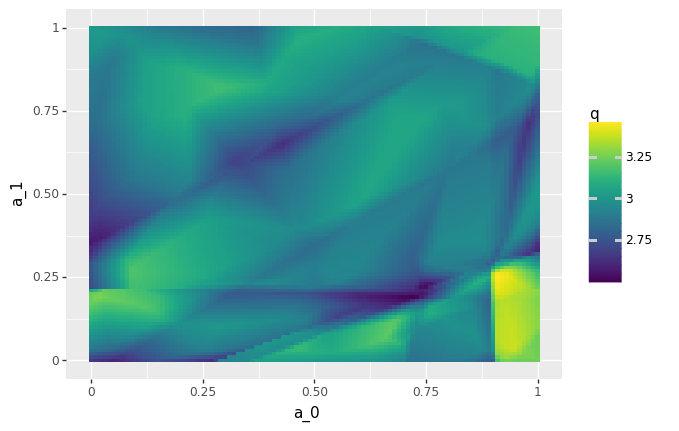

<ggplot: (-9223363246381789436)>

In [1138]:
step = step_vals[-1]
# step = 5000
display(pn.ggplot(q1_map[q1_map['step']==step], pn.aes('a_0', 'a_1', fill='q')) + pn.geom_tile())
display(pn.ggplot(q2_map[q2_map['step']==step], pn.aes('a_0', 'a_1', fill='q')) + pn.geom_tile())
display(pn.ggplot(q_comb[q_comb['step']==step], pn.aes('a_0', 'a_1', fill='q')) + pn.geom_tile())

In [1139]:
q_map = q_comb

0.0


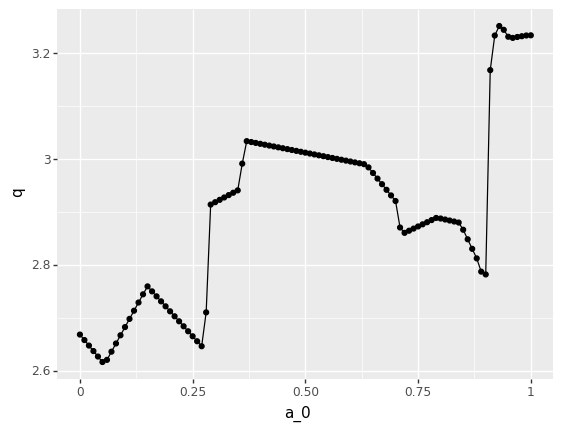

<ggplot: (-9223363246348079928)>

         a_0  a_1       q_x   step       q_y         q
448933  0.89  0.0  2.929293  26999  2.787716  2.787716
448934  0.90  0.0  3.071863  26999  2.782425  2.782425
448935  0.91  0.0  3.243200  26999  3.168386  3.168386
448936  0.92  0.0  3.260925  26999  3.233760  3.233760
448937  0.93  0.0  3.257612  26999  3.251720  3.251720
448938  0.94  0.0  3.244541  26999  3.269680  3.244541
448939  0.95  0.0  3.231470  26999  3.294801  3.231470
448940  0.96  0.0  3.229249  26999  3.339969  3.229249
448941  0.97  0.0  3.231012  26999  3.378641  3.231012
448942  0.98  0.0  3.232417  26999  3.410759  3.232417
448943  0.99  0.0  3.233822  26999  3.431929  3.233822
448944  1.00  0.0  3.234146  26999  3.445568  3.234146
0.1


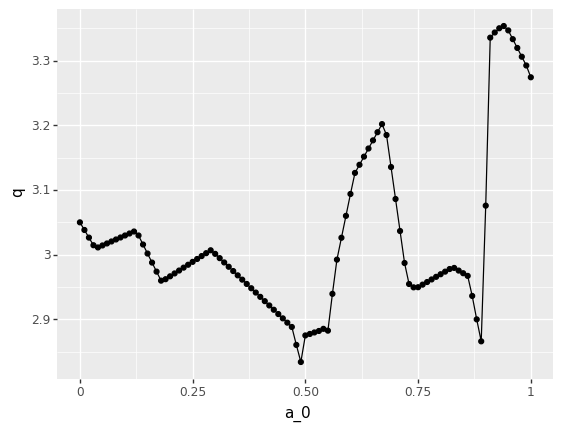

<ggplot: (-9223363246347732501)>

         a_0  a_1       q_x   step       q_y         q
449943  0.89  0.1  2.955020  26999  2.866108  2.866108
449944  0.90  0.1  3.146211  26999  3.075920  3.075920
449945  0.91  0.1  3.335676  26999  3.370780  3.335676
449946  0.92  0.1  3.343633  26999  3.370260  3.343633
449947  0.93  0.1  3.350174  26999  3.369740  3.350174
449948  0.94  0.1  3.353663  26999  3.360463  3.353663
449949  0.95  0.1  3.348759  26999  3.346893  3.346893
449950  0.96  0.1  3.343855  26999  3.333324  3.333324
449951  0.97  0.1  3.338951  26999  3.319754  3.319754
449952  0.98  0.1  3.334046  26999  3.306185  3.306185
449953  0.99  0.1  3.311787  26999  3.292616  3.292616
449954  1.00  0.1  3.274379  26999  3.279046  3.274379
0.2


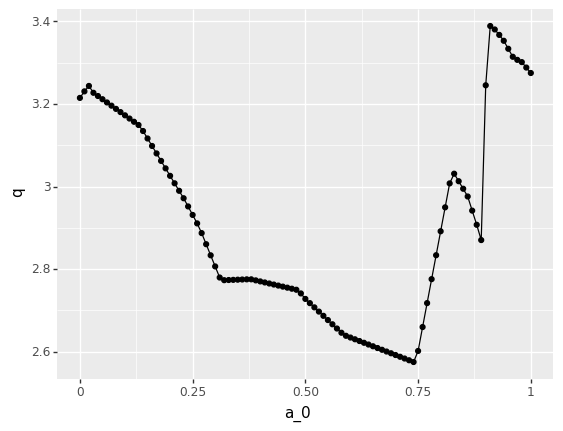

<ggplot: (-9223363246380317068)>

         a_0  a_1       q_x   step       q_y         q
450953  0.89  0.2  3.079278  26999  2.870205  2.870205
450954  0.90  0.2  3.266638  26999  3.245242  3.245242
450955  0.91  0.2  3.388871  26999  3.393698  3.388871
450956  0.92  0.2  3.391864  26999  3.380513  3.380513
450957  0.93  0.2  3.372484  26999  3.367327  3.367327
450958  0.94  0.2  3.353105  26999  3.354142  3.353105
450959  0.95  0.2  3.333725  26999  3.340956  3.333725
450960  0.96  0.2  3.314346  26999  3.327771  3.314346
450961  0.97  0.2  3.306891  26999  3.314586  3.306891
450962  0.98  0.2  3.301987  26999  3.301401  3.301401
450963  0.99  0.2  3.297082  26999  3.288215  3.288215
450964  1.00  0.2  3.292179  26999  3.275030  3.275030
0.3


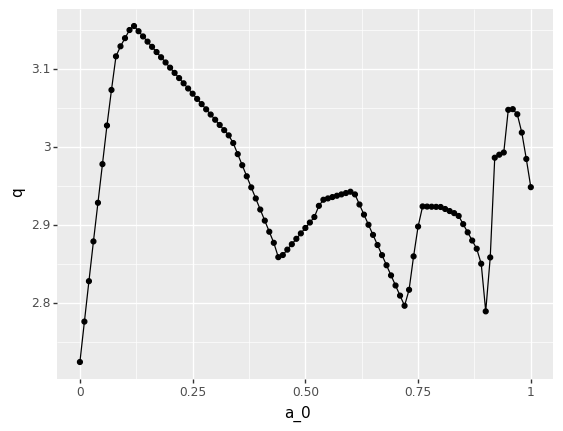

<ggplot: (-9223363246330830518)>

         a_0  a_1       q_x   step       q_y         q
451963  0.89  0.3  2.850078  26999  2.858785  2.850078
451964  0.90  0.3  2.788958  26999  2.917752  2.788958
451965  0.91  0.3  2.858148  26999  2.972426  2.858148
451966  0.92  0.3  2.996652  26999  2.986132  2.986132
451967  0.93  0.3  3.055541  26999  2.989983  2.989983
451968  0.94  0.3  3.053170  26999  2.992806  2.992806
451969  0.95  0.3  3.050799  26999  3.047570  3.047570
451970  0.96  0.3  3.048428  26999  3.101955  3.048428
451971  0.97  0.3  3.041865  26999  3.156341  3.041865
451972  0.98  0.3  3.018388  26999  3.188629  3.018388
451973  0.99  0.3  2.984524  26999  3.177764  2.984524
451974  1.00  0.3  2.948311  26999  3.166899  2.948311


In [1140]:
for a_1_cut in [0.0, 0.1, 0.2, 0.3]:
    print(a_1_cut)
    q_slice = q_map[(q_map.a_1==a_1_cut) & (q_map['step']==step)]
    display(pn.ggplot(q_slice, pn.aes('a_0', 'q')) + pn.geom_point()  + pn.geom_line())
    print(q_slice.tail(12))

0.0


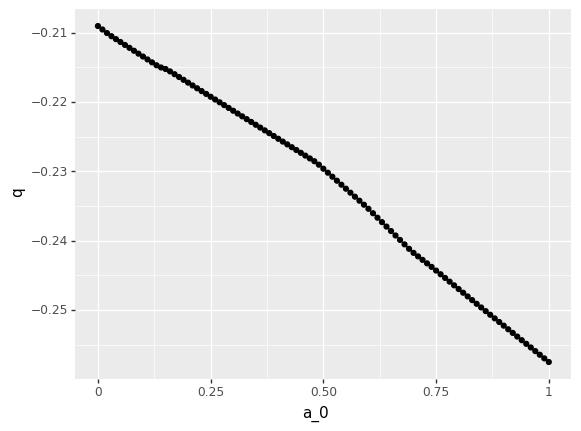

<ggplot: (-9223363246179905006)>

        a_0  a_1       q_x  step       q_y         q
10290  0.89  0.0 -0.251712  1999 -0.019500 -0.251712
10291  0.90  0.0 -0.252236  1999 -0.019272 -0.252236
10292  0.91  0.0 -0.252761  1999 -0.019045 -0.252761
10293  0.92  0.0 -0.253286  1999 -0.018817 -0.253286
10294  0.93  0.0 -0.253810  1999 -0.018606 -0.253810
10295  0.94  0.0 -0.254335  1999 -0.018480 -0.254335
10296  0.95  0.0 -0.254859  1999 -0.018353 -0.254859
10297  0.96  0.0 -0.255384  1999 -0.018226 -0.255384
10298  0.97  0.0 -0.255908  1999 -0.018099 -0.255908
10299  0.98  0.0 -0.256433  1999 -0.017972 -0.256433
10300  0.99  0.0 -0.256958  1999 -0.017845 -0.256958
10301  1.00  0.0 -0.257482  1999 -0.017718 -0.257482
0.1


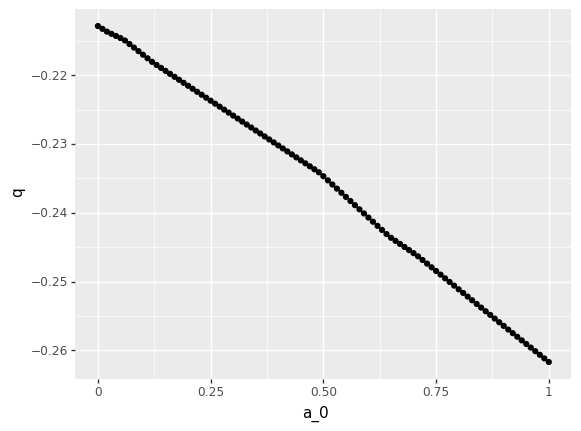

<ggplot: (-9223363246314473619)>

        a_0  a_1       q_x  step       q_y         q
11300  0.89  0.1 -0.255921  1999 -0.024888 -0.255921
11301  0.90  0.1 -0.256454  1999 -0.024698 -0.256454
11302  0.91  0.1 -0.256985  1999 -0.024510 -0.256985
11303  0.92  0.1 -0.257510  1999 -0.024322 -0.257510
11304  0.93  0.1 -0.258035  1999 -0.024134 -0.258035
11305  0.94  0.1 -0.258559  1999 -0.023946 -0.258559
11306  0.95  0.1 -0.259084  1999 -0.023757 -0.259084
11307  0.96  0.1 -0.259608  1999 -0.023569 -0.259608
11308  0.97  0.1 -0.260133  1999 -0.023381 -0.260133
11309  0.98  0.1 -0.260657  1999 -0.023193 -0.260657
11310  0.99  0.1 -0.261182  1999 -0.023004 -0.261182
11311  1.00  0.1 -0.261707  1999 -0.022816 -0.261707
0.2


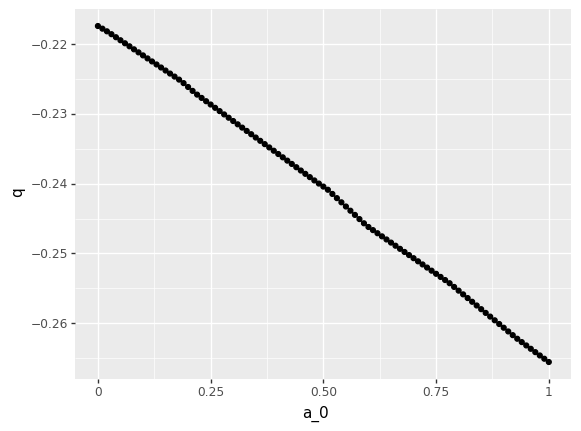

<ggplot: (-9223363246213793827)>

        a_0  a_1       q_x  step       q_y         q
12310  0.89  0.2 -0.260115  1999 -0.029324 -0.260115
12311  0.90  0.2 -0.260647  1999 -0.029134 -0.260647
12312  0.91  0.2 -0.261179  1999 -0.028944 -0.261179
12313  0.92  0.2 -0.261711  1999 -0.028754 -0.261711
12314  0.93  0.2 -0.262228  1999 -0.028565 -0.262228
12315  0.94  0.2 -0.262708  1999 -0.028375 -0.262708
12316  0.95  0.2 -0.263188  1999 -0.028149 -0.263188
12317  0.96  0.2 -0.263669  1999 -0.027876 -0.263669
12318  0.97  0.2 -0.264149  1999 -0.027602 -0.264149
12319  0.98  0.2 -0.264624  1999 -0.027328 -0.264624
12320  0.99  0.2 -0.265094  1999 -0.027054 -0.265094
12321  1.00  0.2 -0.265564  1999 -0.026782 -0.265564
0.3


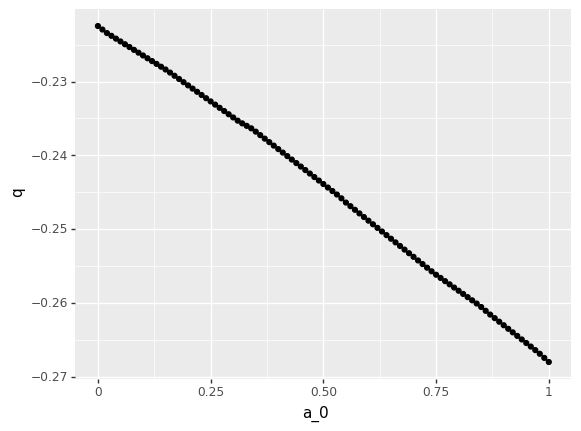

<ggplot: (8790708388535)>

        a_0  a_1       q_x  step       q_y         q
13320  0.89  0.3 -0.262545  1999 -0.033730 -0.262545
13321  0.90  0.3 -0.263026  1999 -0.033457 -0.263026
13322  0.91  0.3 -0.263508  1999 -0.033183 -0.263508
13323  0.92  0.3 -0.263989  1999 -0.032909 -0.263989
13324  0.93  0.3 -0.264470  1999 -0.032635 -0.264470
13325  0.94  0.3 -0.264952  1999 -0.032362 -0.264952
13326  0.95  0.3 -0.265433  1999 -0.032088 -0.265433
13327  0.96  0.3 -0.265914  1999 -0.031814 -0.265914
13328  0.97  0.3 -0.266396  1999 -0.031541 -0.266396
13329  0.98  0.3 -0.266896  1999 -0.031267 -0.266896
13330  0.99  0.3 -0.267453  1999 -0.030993 -0.267453
13331  1.00  0.3 -0.268010  1999 -0.030719 -0.268010


In [1098]:
for a_1_cut in [0.0, 0.1, 0.2, 0.3]:
    print(a_1_cut)
    q_slice = q_map[(q_map.a_1==a_1_cut) & (q_map['step']==step)]
    display(pn.ggplot(q_slice, pn.aes('a_0', 'q')) + pn.geom_point()  + pn.geom_line())
    print(q_slice.tail(12))

0.79


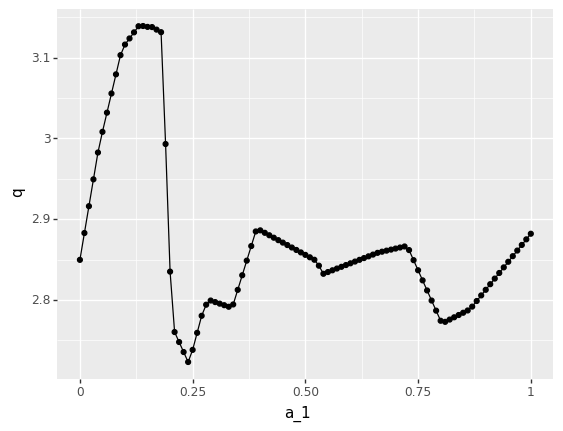

<ggplot: (8790540406739)>

0.8


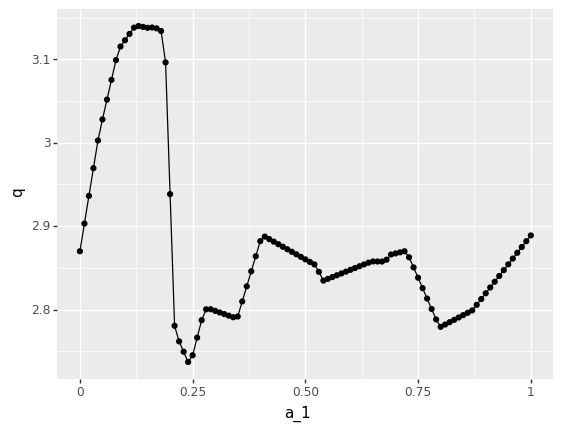

<ggplot: (8790473095309)>

0.81


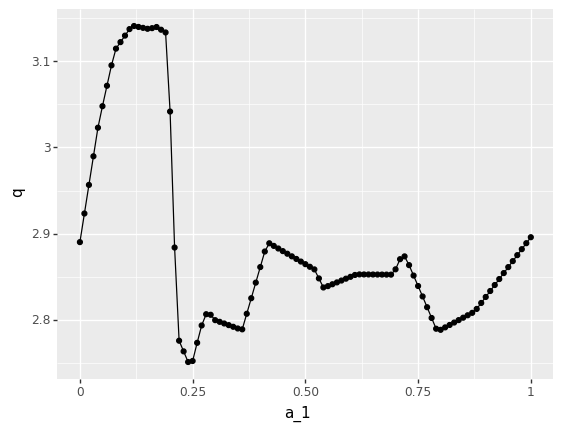

<ggplot: (8790506861709)>

In [766]:
# q_map = q1_map
q_map = q2_map
for a_0_cut in [0.79, 0.8, 0.81]:
    print(a_0_cut)
    q_slice = q_map[(q_map.a_0==a_0_cut) & (q_map['step']==step)]
    display(pn.ggplot(q_slice, pn.aes('a_1', 'q')) + pn.geom_point()  + pn.geom_line())